In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import os
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr
from sklearn import datasets
import time

Could not import rpy package
Could not import r-package RCIT


In [19]:
#data = pd.read_csv("/home/pbatungwanay/Bureau/Muy_climate_crop_data.csv", index_col=[0], parse_dates=True)
#data = pd.read_csv("/home/pbatungwanay/Bureau/Beans.csv", index_col=[0,1], parse_dates=True)
#data = pd.read_csv("/home/pbatungwanay/Bureau/Beans_Muy_Climate.csv", index_col=[0], parse_dates=True)
data = pd.read_csv("/home/pbatungwanay/Bureau/Data/Beans_Muy_Climate_pro.csv", index_col=[0], parse_dates=True)
data.head()

,BP,onset,cessation,duration,SS,MS,Annual
Year,,,,,,,
1961-01-01,230000,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-01,230000,NaN,NaN,NaN,NaN,NaN,NaN
1963-01-01,220000,NaN,NaN,NaN,NaN,NaN,NaN
1964-01-01,245000,NaN,NaN,NaN,NaN,NaN,NaN
1965-01-01,240000,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57 entries, 1961-01-01 to 2017-01-01
Data columns (total 7 columns):
BP           57 non-null int64
onset        32 non-null float64
cessation    32 non-null float64
duration     32 non-null float64
SS           32 non-null float64
MS           32 non-null float64
Annual       32 non-null float64
dtypes: float64(6), int64(1)
memory usage: 3.6 KB


In [21]:
data.head()

,BP,onset,cessation,duration,SS,MS,Annual
Year,,,,,,,
1961-01-01,230000,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-01,230000,NaN,NaN,NaN,NaN,NaN,NaN
1963-01-01,220000,NaN,NaN,NaN,NaN,NaN,NaN
1964-01-01,245000,NaN,NaN,NaN,NaN,NaN,NaN
1965-01-01,240000,NaN,NaN,NaN,NaN,NaN,NaN


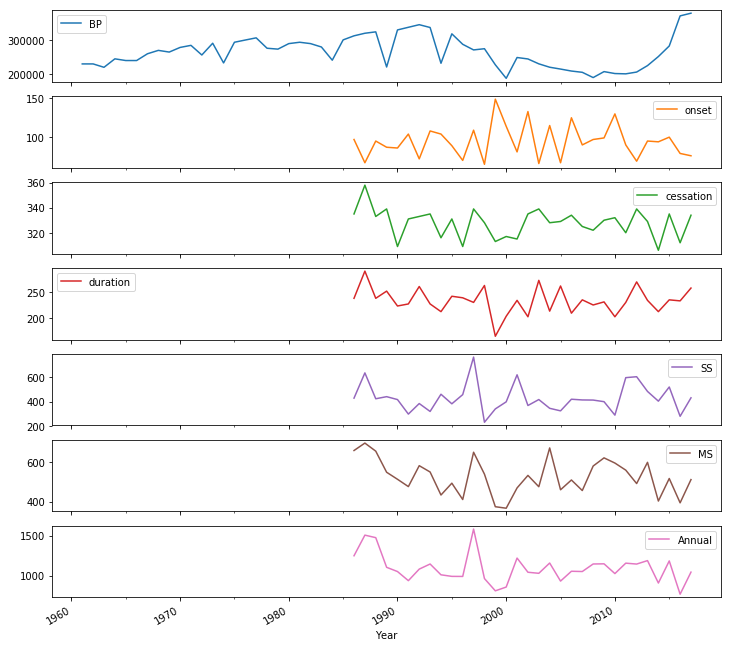

<Figure size 432x288 with 0 Axes>

In [22]:
a = data.plot(subplots=True, figsize=(12, 12))
plt.show()
plt.savefig('/home/pbatungwanay/Bureau/Muyinga/beans/muy_ts.eps')

In [23]:
data.columns

Index(['BP', 'onset', 'cessation', 'duration', 'SS', 'MS', 'Annual'], dtype='object')

In [27]:
data=data.diff()

# remplissage des données manquantes
data = data.fillna(999)



#T = 21     # time series length
#data, true_parents_neighbors = pp.var_process(data, T=T)
#T, N = data.shape
# préparation de la dataframe au format "tigramite"
datatime = np.arange(len(data.values))
datatime


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56])

In [28]:
dataframe = pp.DataFrame(data.values,var_names =data.columns,  # nom des variables
                         missing_flag=999)   # valeurs manquantes reconnues


(<Figure size 360x576 with 7 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce695d2588>,
       dtype=object))

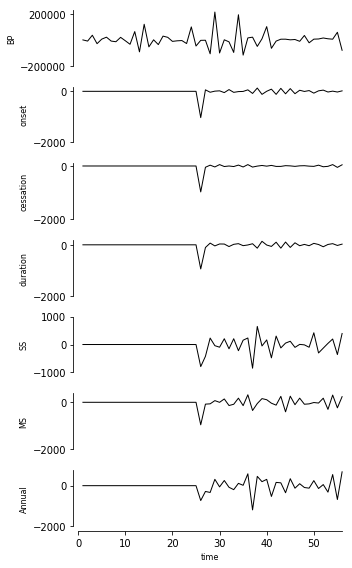

In [29]:
tp.plot_timeseries(dataframe,figsize=(5, 8))
                     # visualisation de la dataframe tigramite
#plt.show()


In [30]:
start_time = time.time()

parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=0)

results = pcmci.run_pcmci(tau_max=3, pc_alpha= 0.01)

pcmci.print_significant_links(
       p_matrix = results['p_matrix'], 
       val_matrix = results['val_matrix'],
       alpha_level = 0.05)
                
print("--- %.2f secondes ---" % (time.time() - start_time))


## Significant links at alpha = 0.05:

    Variable BP has 8 link(s):
        (BP -1): pval = 0.00000 | val = -0.728
        (cessation -3): pval = 0.00073 | val = -0.466
        (SS -3): pval = 0.00168 | val = -0.446
        (duration -3): pval = 0.00161 | val = -0.439
        (BP -2): pval = 0.00274 | val = -0.423
        (onset -3): pval = 0.00383 | val = -0.406
        (onset -2): pval = 0.00714 | val = 0.380
        (cessation -2): pval = 0.04192 | val = 0.292

    Variable onset has 5 link(s):
        (cessation 0): pval = 0.00000 | val = 0.937
        (duration 0): pval = 0.00000 | val = 0.761
        (MS 0): pval = 0.00000 | val = 0.741
        (SS 0): pval = 0.00030 | val = 0.500
        (Annual 0): pval = 0.00500 | val = 0.391

    Variable cessation has 5 link(s):
        (onset 0): pval = 0.00000 | val = 0.937
        (duration 0): pval = 0.00000 | val = 0.934
        (MS 0): pval = 0.00000 | val = 0.721
        (SS 0): pval = 0.00001 | val = 0.602
        (Annual 0): pval

In [31]:
#correlations = pcmci.get_lagged_dependencies(tau_max=5)
#lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':data.columns, 
#                                    'x_base':5, 'y_base':.5})

In [32]:
#pcmci.verbosity = 1
#results = pcmci.run_pcmci(tau_max=5, pc_alpha=None)

In [33]:
#print("p-values")
#print (results['p_matrix'].round(3))
#print("MCI partial correlations")
#print (results['val_matrix'].round(2))

# Plotting

In [34]:
#Saving the resultats

np.save('/home/pbatungwanay/Bureau/Muyinga/beans/p_diff_kir',results['p_matrix'])
np.save('/home/pbatungwanay/Bureau/Muyinga/beans/val_diff_kir',results['val_matrix'])

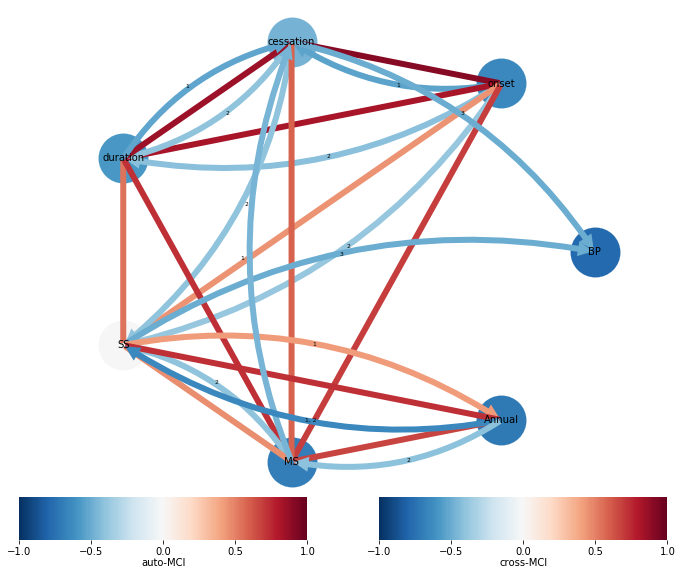

In [35]:
p = np.load('/home/pbatungwanay/Bureau/Muyinga/p_diff_kir.npy')
val = np.load('/home/pbatungwanay/Bureau/Muyinga/val_diff_kir.npy')

link_matrix = pcmci.return_significant_parents(pq_matrix=p,
                                                       val_matrix=val,
                                                       alpha_level=0.01)['link_matrix']

tp.plot_graph(
    val_matrix=val,
    figsize=(10, 10),
    node_size=50,
    arrowhead_size=1.0,
    #arrow_linewidth=20.0,
    link_matrix=link_matrix,
    var_names=data.columns,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=-1,
    vmax_edges = 1,
    edge_ticks=0.5,
    vmin_nodes=-1,
    vmax_nodes=1,
    node_ticks=.5,
    cmap_nodes='RdBu_r')
    
plt.savefig('/home/pbatungwanay/Bureau/Muyinga/beans/tau3alpha005.eps')
  


In [17]:
# pour afficher uniquement les liens vers onset
mb1 = np.zeros((7,7,6), dtype=bool)
mb1[:,1,:] = link_matrix[:,1,:]
mb1[1,:,:] = link_matrix[1,:,:]
link_matrix1 = mb1

tp.plot_graph(
    val_matrix=val,
    figsize=(7, 7),
    node_size=30,
    arrowhead_size=1.0,
    arrow_linewidth=20.0,
    link_matrix=link_matrix1,
    var_names=data.columns,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=-1,
    vmax_edges = 1,
    edge_ticks=0.5,
    vmin_nodes=-1,
    vmax_nodes=1,
    node_ticks=.5,
    cmap_nodes='RdBu_r',
    link_label_fontsize=10)
plt.savefig('/home/pbatungwanay/Bureau/Muyinga/beans/diff_onset2.eps')

NameError: name 'link_matrix' is not defined

In [18]:
# pour afficher uniquement les liens vers SS
mb1 = np.zeros((7,7,6), dtype=bool)
mb1[:,4,:] = link_matrix[:,4,:]
mb1[4,:,:] = link_matrix[4,:,:]
link_matrix1 = mb1

tp.plot_graph(
    val_matrix=val,
    figsize=(7, 7),
    node_size=30,
    arrowhead_size=1.0,
    arrow_linewidth=35.0,
    link_matrix=link_matrix1,
    var_names=data.columns,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=-1,
    vmax_edges = 1,
    edge_ticks=0.5,
    vmin_nodes=-1,
    vmax_nodes=1,
    node_ticks=.5,
    cmap_nodes='RdBu_r',
    link_label_fontsize=10)
plt.savefig('/home/pbatungwanay/Bureau/Muyinga/beans/diff_SS2.eps')

NameError: name 'link_matrix' is not defined

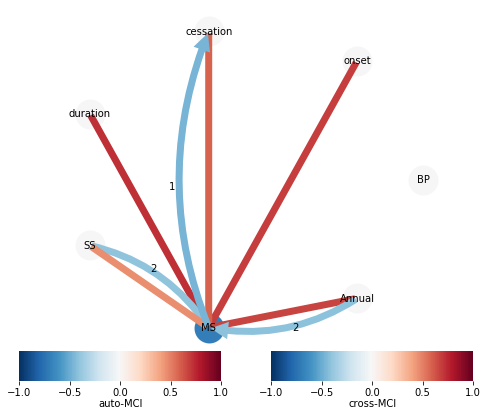

In [83]:
# pour afficher uniquement les liens vers MS
mb1 = np.zeros((7,7,6), dtype=bool)
mb1[:,5,:] = link_matrix[:,5,:]
mb1[5,:,:] = link_matrix[5,:,:]
link_matrix1 = mb1

tp.plot_graph(
    val_matrix=val,
    figsize=(7, 7),
    node_size=30,
    arrowhead_size=1.0,
    arrow_linewidth=35.0,
    link_matrix=link_matrix1,
    var_names=data.columns,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=-1,
    vmax_edges = 1,
    edge_ticks=0.5,
    vmin_nodes=-1,
    vmax_nodes=1,
    node_ticks=.5,
    cmap_nodes='RdBu_r',
    link_label_fontsize=10)
plt.savefig('/home/pbatungwanay/Bureau/Muyinga/beans/diff_MS2.eps')

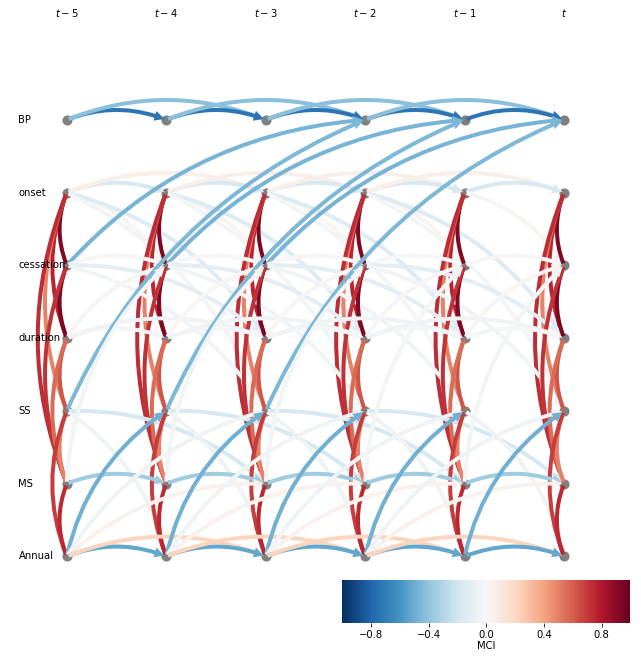

<Figure size 432x288 with 0 Axes>

In [84]:
# Plot time series graph
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=data.columns,
    link_colorbar_label='MCI',
    figsize=(10, 10),
    )
plt.savefig('/home/pbatungwanay/Bureau/Muyinga/beans/lagged.eps')

In [34]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=8, pc_alpha=None)


##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 8
pc_alpha = None
max_conds_dim = None
max_combinations = 1



## Variable BP

## Variable onset

## Variable cessation

## Variable duration

## Variable SS

## Variable MS

## Variable Annual

## Resulting condition sets:

    Variable BP has 7 parent(s):
    [pc_alpha = 0.4]
        (BP -1): max_pval = 0.00041, min_val = 0.538
        (onset -2): max_pval = 0.03297, min_val = 0.351
        (cessation -3): max_pval = 0.09835, min_val = 0.272
        (onset -7): max_pval = 0.11525, min_val = 0.266
        (SS -3): max_pval = 0.17589, min_val = 0.224
        (duration -8): max_pval = 0.27114, min_val = 0.186
        (Annual -5): max_pval = 0.31235, min_val = 0.164

    Variable onset has 2 parent(s):
    [pc_alpha = 0.3]
        (BP -2): max_pval = 0.07586, min_val = 0.284
        (BP -8): max_pval = 0.22549, min_val = 0.196

    Variable cessation has 0 parent(s):
    [pc_alpha = 0

In [257]:
import seaborn as sns

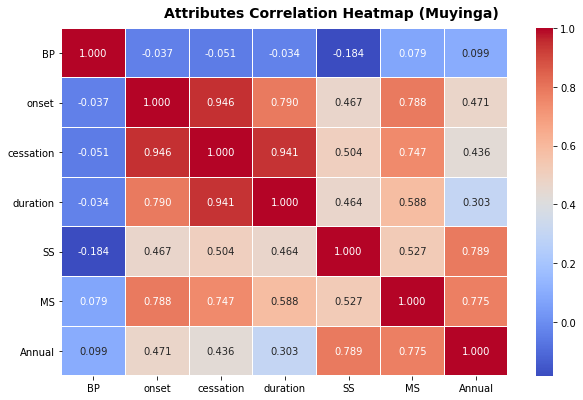

In [258]:
corr = data.corr()
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
#ax = sns.heatmap(
#   corr, 
#    vmin=-1, vmax=1, center=0,
#    cmap=sns.diverging_palette(20, 220, n=200),
#    square=False, annot=True
#)
hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.3f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)



#ax.set_xticklabels(
 #   ax.get_xticklabels(),
  #  rotation=45,
   # horizontalalignment='right'
#);

fig.subplots_adjust(top=0.93)
fig.suptitle('Attributes Correlation Heatmap (Muyinga)', 
              fontsize=14, 
              fontweight='bold')

plt.savefig('/home/pbatungwanay/Bureau/Muyinga/Corr.eps')